In [44]:
# Initial imports and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas

In [22]:
# Read the data file into Pandas DataFrame
df = pd.read_csv('all_data_merged.csv')
df.head()

,Unnamed: 0,Year,State,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,...,Unemployed_2017,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020
0,0,2017,Alabama,1,712000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
1,1,2018,Alabama,1,217000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
2,2,2019,Alabama,1,680000,0,0,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
3,3,2020,Alabama,1,794000,362015,7189,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958
4,4,2021,Alabama,1,794000,904526,16747,438947,1014342,1013673,...,99585,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958


In [23]:
# Make a copy of the DataFrame
df2 = df.copy()

In [24]:
# Get the column names
df2.columns

Index(['Unnamed: 0', 'Year', 'State', 'FIPS', '18_or_Older_AMI_Total',
       'Tot_Cases', 'Toth_Deaths', '<High School', 'High School',
       'Some college or associates degree', 'Bachelors degree or higher',
       'Employed_2017', 'Unemployed_2017', 'Employed_2018', 'Unemployed_2018',
       'Employed_2019', 'Unemployed_2019', 'Employed_2020', 'Unemployed_2020',
       'Employed_2021', 'Unemployed_2021', 'Median_Household_Income_2020'],
      dtype='object')

In [25]:
# Drop Unnecessary columns
df2.drop(['Unnamed: 0'], axis = 1, inplace = True)

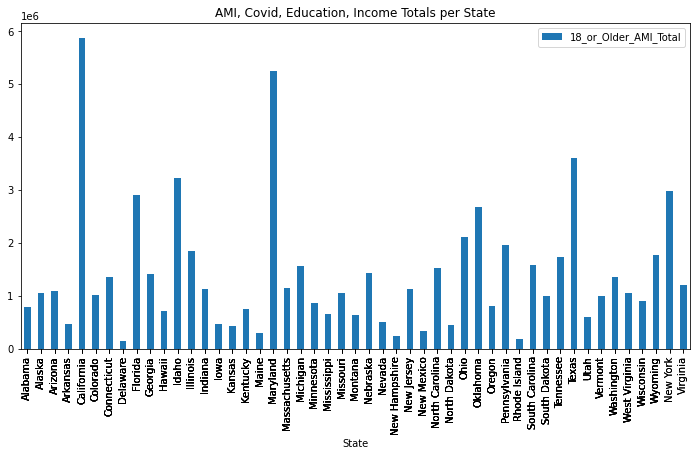

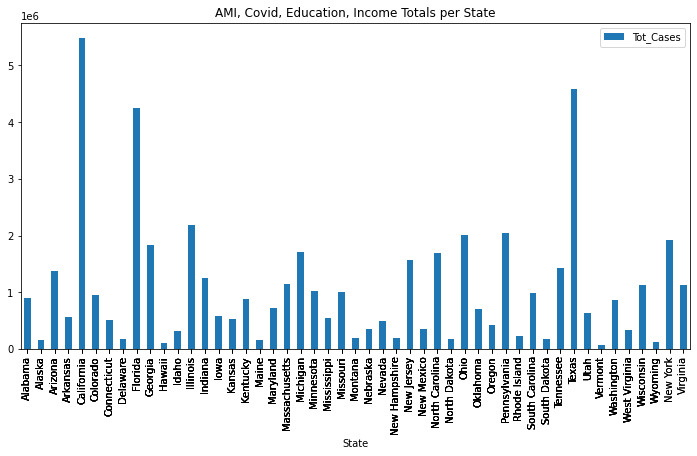

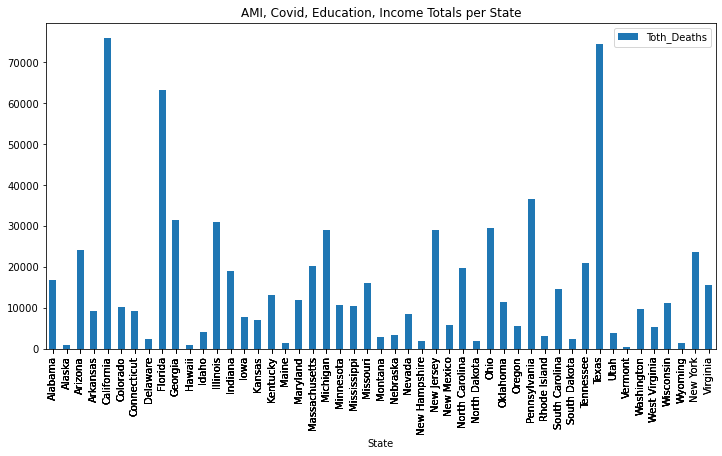

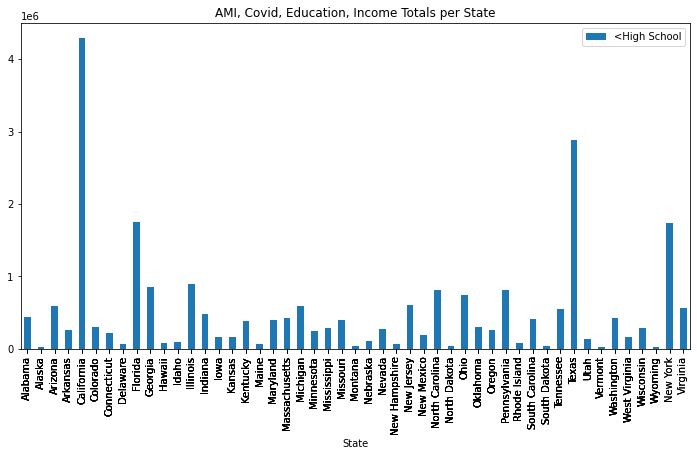

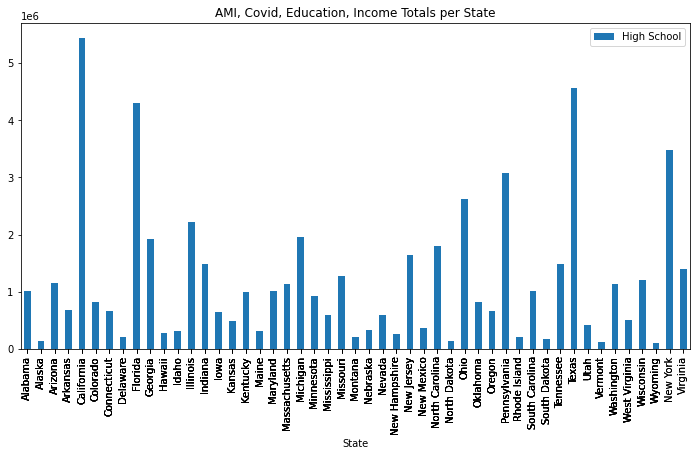

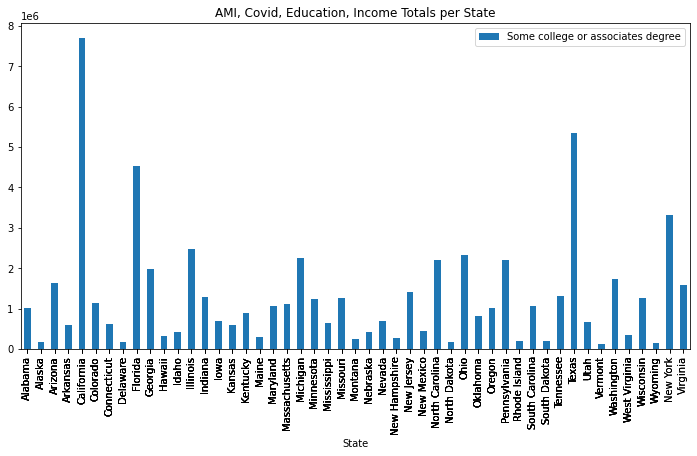

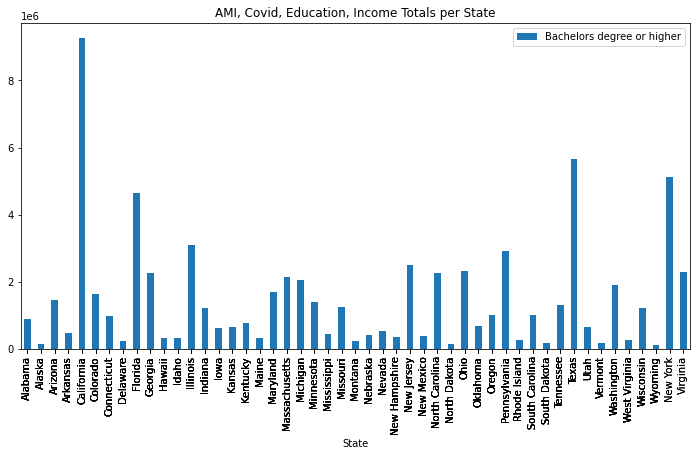

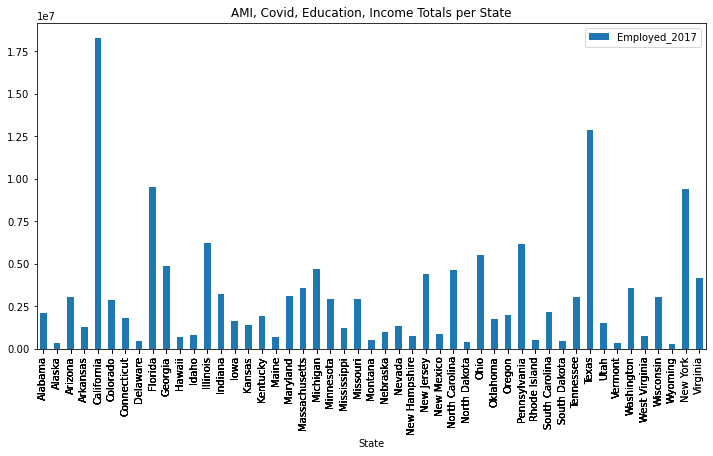

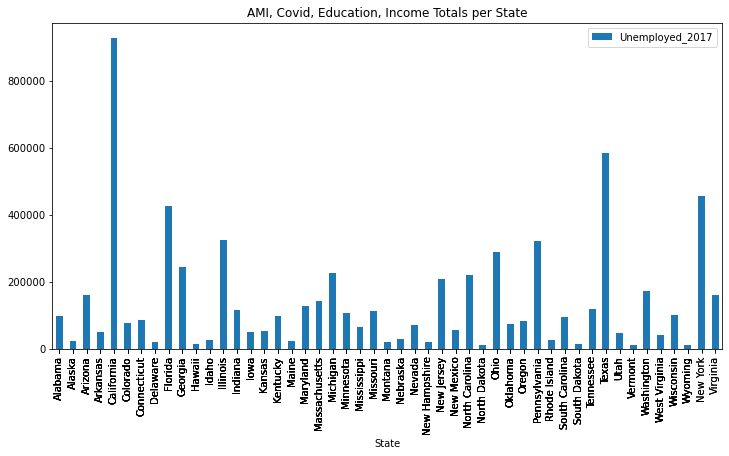

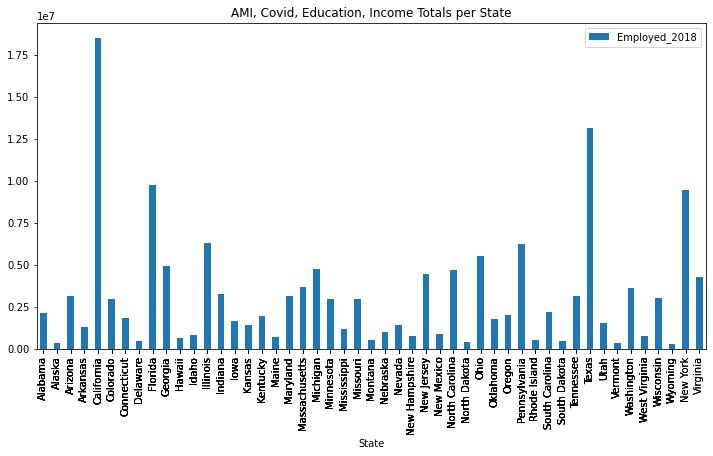

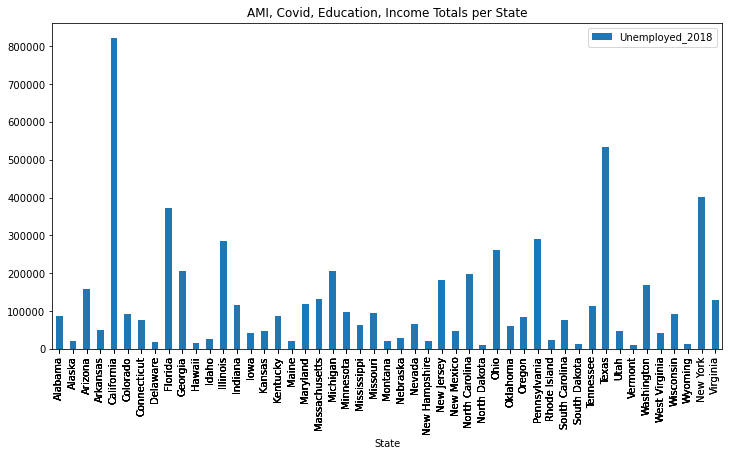

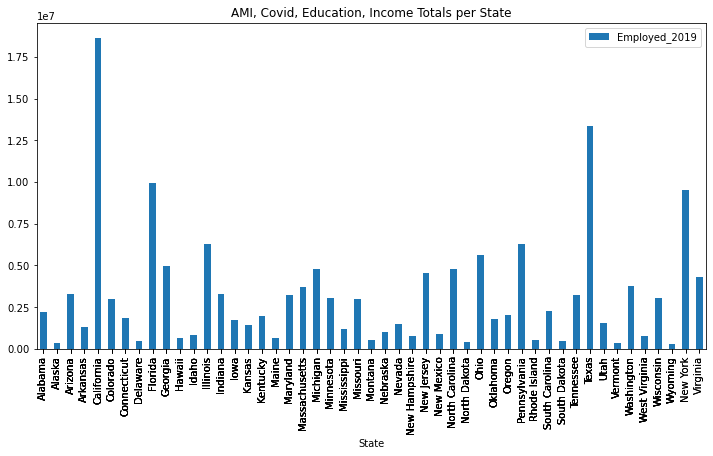

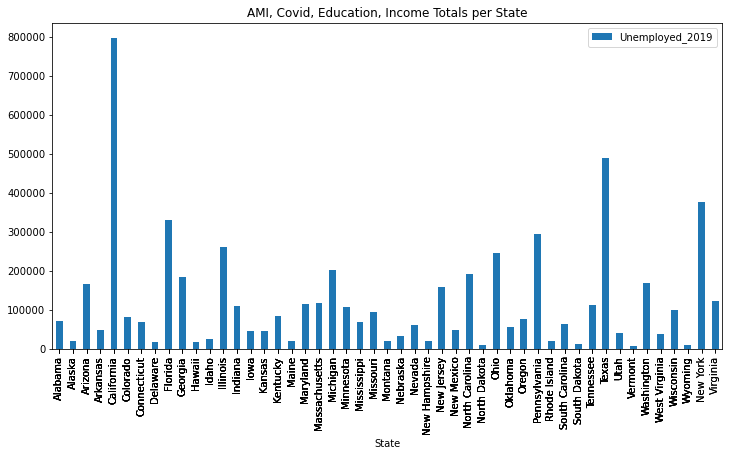

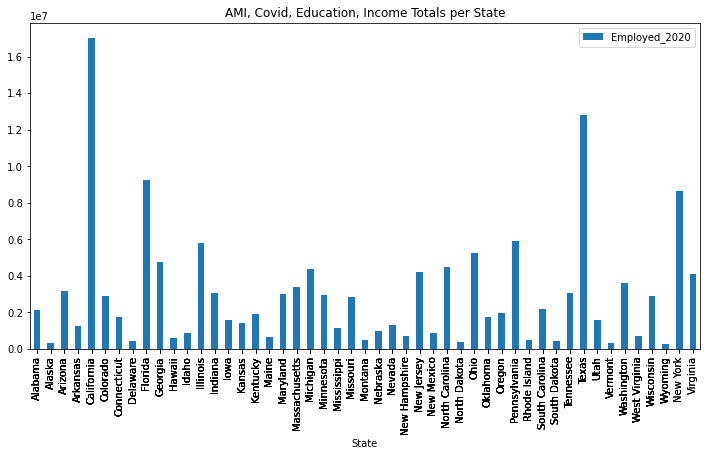

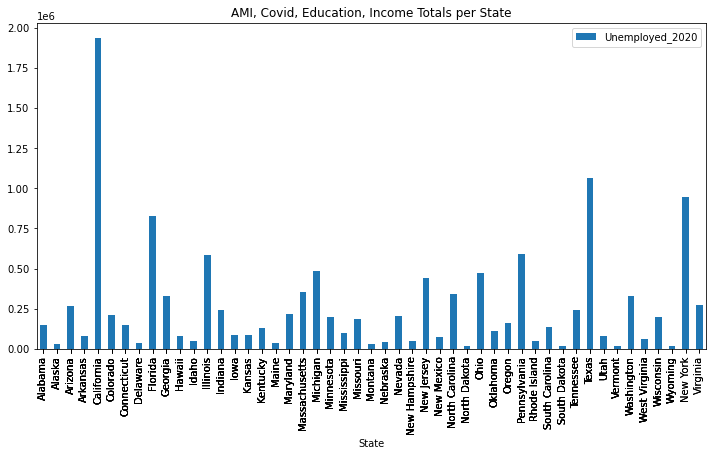

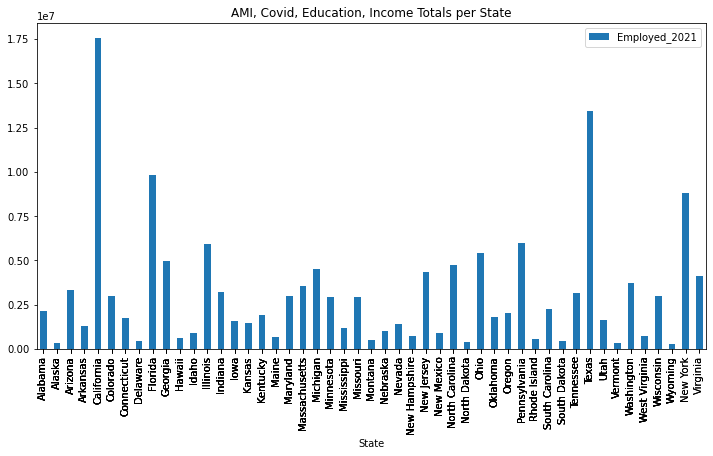

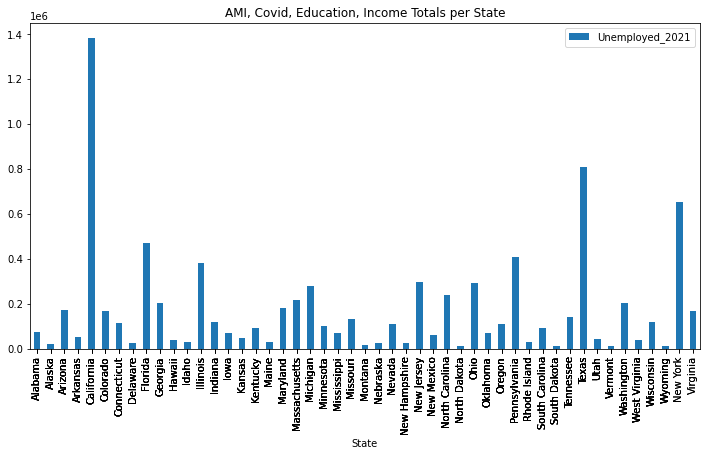

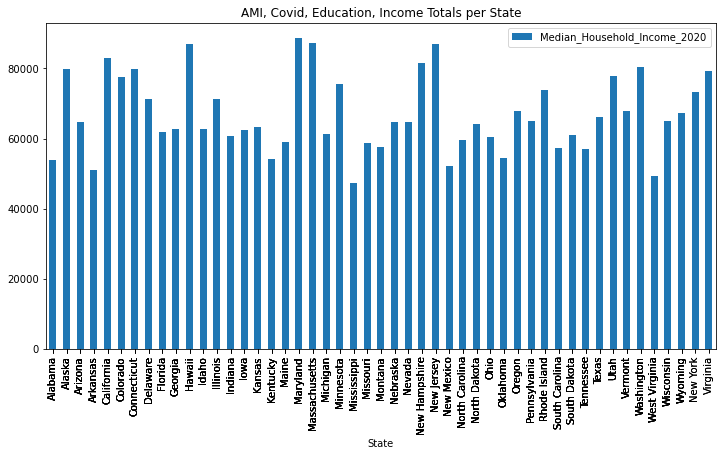

In [26]:
# Use bar graph to show total numbers of each feature per state
from matplotlib.pyplot import xlabel
cols=['18_or_Older_AMI_Total',
       'Tot_Cases', 'Toth_Deaths', '<High School', 'High School',
       'Some college or associates degree', 'Bachelors degree or higher',
       'Employed_2017', 'Unemployed_2017', 'Employed_2018', 'Unemployed_2018',
       'Employed_2019', 'Unemployed_2019', 'Employed_2020', 'Unemployed_2020',
       'Employed_2021', 'Unemployed_2021', 'Median_Household_Income_2020']
for col in cols:
    df2.plot(kind='bar' , x='State', y = col, title='AMI, Covid, Education, Income Totals per State', figsize= (12,6))
    ylabel = 'Total Numbers'

# df2.plot(kind='bar' , x='State', y = 'Tot_Cases', title='Total # of Covid-19 Cases Per State', figsize= (15,6))

In [27]:
# Drop State as it is a String column
df2.drop(['State'], axis = 1, inplace = True)

In [28]:
#Check the data types for each column
df2.dtypes

Year                                 int64
FIPS                                 int64
18_or_Older_AMI_Total                int64
Tot_Cases                            int64
Toth_Deaths                          int64
<High School                         int64
High School                          int64
Some college or associates degree    int64
Bachelors degree or higher           int64
Employed_2017                        int64
Unemployed_2017                      int64
Employed_2018                        int64
Unemployed_2018                      int64
Employed_2019                        int64
Unemployed_2019                      int64
Employed_2020                        int64
Unemployed_2020                      int64
Employed_2021                        int64
Unemployed_2021                      int64
Median_Household_Income_2020         int64
dtype: object

In [29]:
inertia = []
k = list(range(1, 11))

In [30]:
# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2)
    inertia.append(km.inertia_)

In [31]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [32]:
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [33]:
five_clusters = get_clusters(5, df2)
five_clusters.head()

,Year,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths,<High School,High School,Some college or associates degree,Bachelors degree or higher,Employed_2017,...,Employed_2018,Unemployed_2018,Employed_2019,Unemployed_2019,Employed_2020,Unemployed_2020,Employed_2021,Unemployed_2021,Median_Household_Income_2020,class
0,2017,1,712000,0,0,438947,1014342,1013673,877044,2103873,...,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958,0
1,2018,1,217000,0,0,438947,1014342,1013673,877044,2103873,...,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958,0
2,2019,1,680000,0,0,438947,1014342,1013673,877044,2103873,...,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958,0
3,2020,1,794000,362015,7189,438947,1014342,1013673,877044,2103873,...,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958,0
4,2021,1,794000,904526,16747,438947,1014342,1013673,877044,2103873,...,2153080,87397,2199868,72024,2121149,147160,2169721,77272,53958,0


In [34]:
# Plotting the 2D-Scatter with x = Total cases for Covid and y = AMI totals
five_clusters.hvplot.scatter(x="Tot_Cases", y = "18_or_Older_AMI_Total", by = "class")

:NdOverlay   [class]
   :Scatter   [Tot_Cases]   (18_or_Older_AMI_Total)

In [35]:
# Plot the 3D-scatter with x="Annual Income", y="Spending Score (1-100)" and z="Age"
fig = px.scatter_3d(
    five_clusters,
    x="Tot_Cases",
    y="18_or_Older_AMI_Total",
    z="Toth_Deaths",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

## Dandogram

In [42]:
# Standardize data with StandardScaler

ami_scaled = StandardScaler().fit_transform(df2)
print(ami_scaled[0:5])

[[-1.42920309 -1.78648549 -0.18210173 -0.43638996 -0.44046573 -0.07632014
  -0.12201488 -0.18035016 -0.32608271 -0.26592167 -0.21798327 -0.259463
  -0.23852809 -0.2549521  -0.31897266 -0.24208909 -0.31714511 -0.24830208
  -0.38623008 -1.18549391]
 [-0.72346024 -1.78648549 -0.69651302 -0.43638996 -0.44046573 -0.07632014
  -0.12201488 -0.18035016 -0.32608271 -0.26592167 -0.21798327 -0.259463
  -0.23852809 -0.2549521  -0.31897266 -0.24208909 -0.31714511 -0.24830208
  -0.38623008 -1.18549391]
 [-0.01771739 -1.78648549 -0.2153566  -0.43638996 -0.44046573 -0.07632014
  -0.12201488 -0.18035016 -0.32608271 -0.26592167 -0.21798327 -0.259463
  -0.23852809 -0.2549521  -0.31897266 -0.24208909 -0.31714511 -0.24830208
  -0.38623008 -1.18549391]
 [ 0.68802545 -1.78648549 -0.09688612  0.09254173  0.24979796 -0.07632014
  -0.12201488 -0.18035016 -0.32608271 -0.26592167 -0.21798327 -0.259463
  -0.23852809 -0.2549521  -0.31897266 -0.24208909 -0.31714511 -0.24830208
  -0.38623008 -1.18549391]
 [ 1.3937683

In [45]:
pca = PCA(n_components=2)

In [46]:
# Get two principal components for the iris data.
ami_pca = pca.fit_transform(ami_scaled)

In [47]:
# Transform PCA data to a DataFrame
df_ami_pca = pd.DataFrame(
    data = ami_pca, columns = ["principal component 1", "principal component 2"])
df_ami_pca.head()

,principal component 1,principal component 2
0,-1.063536,-1.142445
1,-1.159597,-0.782886
2,-1.048048,-0.345811
3,-0.848441,0.751055
4,-0.607497,2.115835


In [48]:
import plotly.figure_factory as ff

In [49]:
# Create the dendrogram
fig = ff.create_dendrogram(df_ami_pca, color_threshold=0)
fig.update_layout(width=1200, height=500)
fig.show()

In [51]:
agg = AgglomerativeClustering(n_clusters=5)
model = agg.fit(df_ami_pca)

In [52]:
# Add a new class column to df_iris
df_ami_pca["class"] = model.labels_
df_ami_pca.head()

,principal component 1,principal component 2,class
0,-1.063536,-1.142445,2
1,-1.159597,-0.782886,2
2,-1.048048,-0.345811,2
3,-0.848441,0.751055,2
4,-0.607497,2.115835,0


In [53]:
df_ami_pca.hvplot.scatter(
    x= "principal component 1",
    y= "principal component 2",
    hover_cols=["class"],
    by= "class"
)

:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2,class)